# Predictions Facebook Stocks 

### Description: This program predicts the price of FB stocks for a specific day using the Machine Learning algorithm  called Support Vector Regression (SVR) Model


In [1]:
# import the packages 
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [2]:
# Load the data
df = pd.read_csv('D:/Downloads/fb_price-history-05-30-2020.csv')
df.head()

,Time,Open,High,Low,Last,Change,Volume
0,5/29/2020,225.20,227.4900,222.8800,225.09,-0.37,23322400
1,5/28/2020,224.30,231.6332,224.0000,225.46,-3.68,29423000
2,5/27/2020,229.07,230.5600,221.1347,229.14,-3.06,34697500
3,5/26/2020,239.77,240.9000,231.6700,232.20,-2.71,33178300
4,5/22/2020,231.51,235.9900,228.7400,234.91,3.52,33925500


In [3]:
# Create the lists / X and y dataset
dates = []
prices = []

In [4]:
# Get the number of rows and collumns in the dataset
df.shape

(20, 7)

In [5]:
# Print the last row of data (this will be the one that we test on)
df.head(1)

,Time,Open,High,Low,Last,Change,Volume
0,5/29/2020,225.2,227.49,222.88,225.09,-0.37,23322400


In [6]:
# Get all the data except the last row
df = df.head(len(df) - 1)
print(df.shape)

(19, 7)


In [7]:
df_dates = df.loc[:, 'Time'] # Get all of the rows from the date column
df_open = df.loc[:, 'Open'] # Get all of the rows from the Open column

In [8]:
# Create the independent dataset 'X' as dates
for date in df.Time:
    dates.append([int(date.split('/')[1])])
    
# Create the depend dataset 'y' as prices
for open_price in df_open:
    prices.append(float(open_price))

In [9]:
# See what days where recorded in the dateset
print(dates)

[[29], [28], [27], [26], [22], [21], [20], [19], [18], [15], [14], [13], [12], [11], [8], [7], [6], [5], [4]]


In [10]:
# Function to make predictions using 3 different support vector regression models with 3 diferent kernals
def predict_prices(dates, prices, x):
    
    # Create 3 Support Vector Regression Models
    svr_lin = SVR(kernel='linear', C = 1e3)
    svr_poly = SVR(kernel='poly', C = 1e3, degree = 2)
    svr_rbf = SVR(kernel='rbf', C = 1e3, gamma = 0.1)
    
    #Train the models on the dates and prices
    svr_lin.fit(dates, prices)
    svr_poly.fit(dates, prices)
    svr_rbf.fit(dates, prices)
    
    # Plot the model on a graph to see which has the best fit 
    plt.scatter(dates, prices, color='orange', label='Data')
    plt.scatter(dates, svr_rbf.predict(dates), color='red', label='RBF model')
    plt.scatter(dates, svr_lin.predict(dates), color='green', label='Linear model')
    plt.scatter(dates, svr_poly.predict(dates), color='blue', label='Polynomial model')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Support Vector Regression')
    plt.legend()
    plt.show()
    
    #returning all three model predictions
    return svr_rbf.predict(x)[0], svr_lin.predict(x)[0], svr_poly.predict(x)[0]

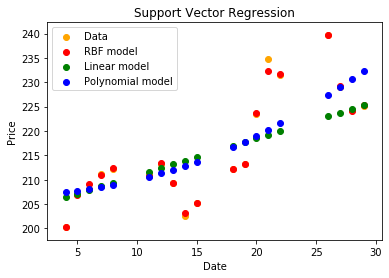

(224.47494787399, 226.0575000000411, 234.13523222933458)


In [11]:
# predict the price of FB on day 30
predicted_price = predict_prices(dates, prices, [[30]])
print(predicted_price)

In [12]:
# As we can see the predictions were pretty close to the price